<a href="https://colab.research.google.com/github/OrvilaSarker/blockchain-consensus/blob/master/ARPRL_for_nodes_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

enter initial state
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:100: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:121: RuntimeWarning: invalid value encountered in true_divide


enter current state
0
1145.0


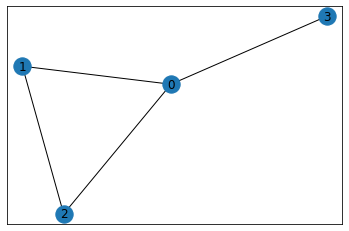

In [ ]:
import numpy as np
import pylab as plt
import math
import networkx as nx #for calculating the network
import time #to calculate the time
import os,psutil  #to calculate the memory of this program
from numpy import asarray #for converting output array to csv file we need the following packages
from numpy import savetxt #for converting output array to csv file we need the following packages
from IPython.display import HTML #this library is required to get a dowload link after creating a csv file
import base64  #this library is required to get a dowload link after creating a csv file
import pandas as pd  #this library is required to get a dowload link after creating a csv file
from IPython.display import FileLink, FileLinks #this library is required to get a dowload link after creating a csv file

#for node number 4
# map cell to cell, add circular cell to goal point
points_list = [(0,1),(0,2),(0,3),(1,2)]
goal = 3 #Our starting point is 0, our goal point is 3.

#import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
#plt.show()

#for node number 8

R = np.matrix(np.zeros(shape = (4,4)))
for i in range (0,4):
    for j in range (0,4):
        R[i,j] = -100
        
R[0,1] = R[0,2] = R[0,3] = R[1,2] = R[2,3] = R[3,3] = 110
#print("Reward matrix:\n", R)


vmax = 45
vmin = 5
velocity = np.array([5, 30, 25, 40]) #for node  number 4

MATRIX_SIZE = 4
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
#This block is created by orvila

count = np.matrix(np.zeros([1,4])) #this empty array is just to count which action has been tried how many times
#print(count)
threshold = -100
trust_threshold = 0.5

initial_state = current_state = int(input("enter initial state\n"))


def available_actions(state):
    av_act = np.array([])
    for i in range(0,4): #the range is from 0 to number of columns+1
        if R[state, i] > threshold:  
            av_act = np.append(av_act, int(i))
    return av_act
available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    #print(available_actions_range)
    next_action = int(np.random.choice(available_act,1)) 
    #print(next_action)
    return next_action

    
action = sample_next_action(available_act)
count[0,action] = 0

N = len(available_act) #no of neighbours
#print("total_no_of_neighbours:",N)
available_act_integers = available_act.astype(int) #to convert the available action array into interger
listsss = []
for i in available_act_integers:
    a = R[current_state,i] #finding the rewards of the corresponding actions
    listsss.append(a) #make an array of those rewards
total_rewards = 0
for item in listsss:
    total_rewards  = total_rewards + item
#print("total rewards",total_rewards)
gamma_interim = total_rewards/N
gamma = np.round(gamma_interim,decimals = 2)
#print("Gamma",gamma)

alpha_iterim =  (abs(velocity[current_state] - velocity[action]))/(vmax-vmin)
alpha = max(0.2, alpha_iterim)

def update(current_state, action, alpha, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  #Q[current_state, action] = R[current_state, action] + alpha * max_value
  Q[current_state, action] = R[current_state, action] + alpha * (gamma)*(max_value) #gamma is included by orvila
  #print('max_value', R[current_state, action] + alpha *(gamma) * max_value)
  alpha_iterim =  (abs(velocity[current_state] - velocity[action]))/(vmax-vmin) #included by orvila
  alpha = max(0.2, alpha_iterim ) #included by orvila
  N = len(available_act) #no of neighbours
  #print("total_no_of_neighbours:",N)
  available_act_integers = available_act.astype(int) #to convert the available action array into interger
  listsss = []
  for i in available_act_integers:
      a = R[current_state,i] #finding the rewards of the corresponding actions
    #print(a, type(a))
  listsss.append(a) #make an array of those rewards
  #print(listsss, type(listsss)) 
  total_rewards = 0
  for item in listsss:
    #print(item)
    total_rewards  = total_rewards + item
    #print("total rewards",total_rewards)
    gamma = total_rewards/N
    #print("gamma:",gamma)
  if (np.max(Q) > 0):
   return(np.sum(Q/np.max(Q)*100), alpha,gamma)
  else:
   return (0, alpha, gamma)

# Training
scores = []  #an empty list
for i in range(2000):
    #if i%600 = 0:
    current_state = np.random.randint(0, int(Q.shape[0])) #Q.shape[0] displays number of rows,Q.shape[1] displays number of columns,
    #print("current state:",current_state)
    available_act = available_actions(current_state) 
    #print("available_act:",available_act)
    action = sample_next_action(available_act)
    #print("sample next action:",action)
    count[0,action] = count[0,action] + 1
    score, alpha, gamma = update(current_state,action,alpha,gamma)
    #print(count)
    #print("alpha:", alpha)
    #print("gamma:", gamma) #print alpha for each episode
    scores.append(score)  #appends an element to the end of the list
    #print ('Score:', str(score))

#plt.plot(scores)
#plt.show()

# Testing
current_state = int(input("enter current state\n"))
steps = [current_state]
start_time = time.time()
while current_state != 3:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:   #
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index
    count[0,action] = count[0,action] + 1
    #print(current_state)

print(count[0, 3])
#print("--- %s seconds ---" % (time.time() - start_time))
#print("total memory used in MB:\n",psutil.Process(os.getpid()).memory_info().rss/1024**2)  #calculates the total memory in MB used by this program
#print("Most efficient path:")
#print(steps)
#print("Average hop count:", (len(steps)-1))
#print("Number of times actions were tried:", count)
#rounded_scores = np.round(scores, decimals=0)
#print(rounded_scores)
#print(scores)
#plt.plot(scores)
#plt.show()